# Experimentation with kMeans Clustering


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Recude-Dimensionality-with-PCA" data-toc-modified-id="Recude-Dimensionality-with-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recude Dimensionality with PCA</a></span></li><li><span><a href="#Apply-k-means-Clustering-and-evaluate-Silhouette-Scores" data-toc-modified-id="Apply-k-means-Clustering-and-evaluate-Silhouette-Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Apply k-means Clustering and evaluate Silhouette Scores</a></span></li><li><span><a href="#Append-clusters-to-profile" data-toc-modified-id="Append-clusters-to-profile-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Append clusters to profile</a></span></li><li><span><a href="#EDA,-2" data-toc-modified-id="EDA,-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA, 2</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from settings import collection_path, collection_cols, collection_genres, feature_list, args_outliers
from load import load_collection, create_albums_data

# my own custom functions
import EDA_functions as EDA

# visualization
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use(['default', 'raph-base'])
import seaborn as sns

from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
collection = load_collection(collection_path, collection_cols, collection_genres)

In [3]:
album_data = create_albums_data(collection, feature_list, args_outliers)

Dismember - Pieces NOT FOUND on Spotify
Dismember - Skin Her Alive NOT FOUND on Spotify
Dismember - Like An Everflowing Stream NOT FOUND on Spotify
Dismember - Where Ironcrosses Flow NOT FOUND on Spotify
Hypocrisy - Too Drunk To Fuck NOT FOUND on Spotify
Dismember - Indicent & Obscene NOT FOUND on Spotify
Fatalist - The Dephts Of Inhumanity NOT FOUND on Spotify
Skeletal Remains - Beyond The Flesh NOT FOUND on Spotify
Insurgency - No Worlds … Nor Gods Beyond NOT FOUND on Spotify
Cianide - Unhumanized NOT FOUND on Spotify


In [55]:
# Save to csv
# album_data.to_csv("data/interim/album_data.csv", index=False)
# Load from csv
album_data = pd.read_csv("data/interim/album_data.csv")

In [56]:
# Check
album_data.sample(5)

,Artist,Album,danceability,energy,key,mode,instrumentalness,valence,tempo,loudness,duration_ms
58,Decaying,To Cross The Line,0.330286,0.962429,4.428571,1.000000,0.717714,0.142786,125.345857,-6.433571,296266.571429
82,Petrification,Hollow of The Void,0.173044,0.753556,4.888889,0.777778,0.836222,0.187578,125.637000,-11.916556,240264.000000
22,Entombed,Left Hand Path,0.199909,0.967000,5.090909,1.000000,0.553945,0.215364,133.051000,-7.037364,221406.000000
85,Cannibal Corpse,Tomb Of The Mutilated,0.291556,0.988889,8.444444,0.333333,0.792667,0.278889,117.548333,-7.680000,234154.000000
77,Deathgrave,"So Real, It's Now",0.195800,0.930500,6.750000,1.000000,0.767167,0.254150,127.760750,-4.518000,106225.500000


In [57]:
# Remove the albums without data
album_data = album_data.loc[album_data['danceability'] > 0]

## EDA

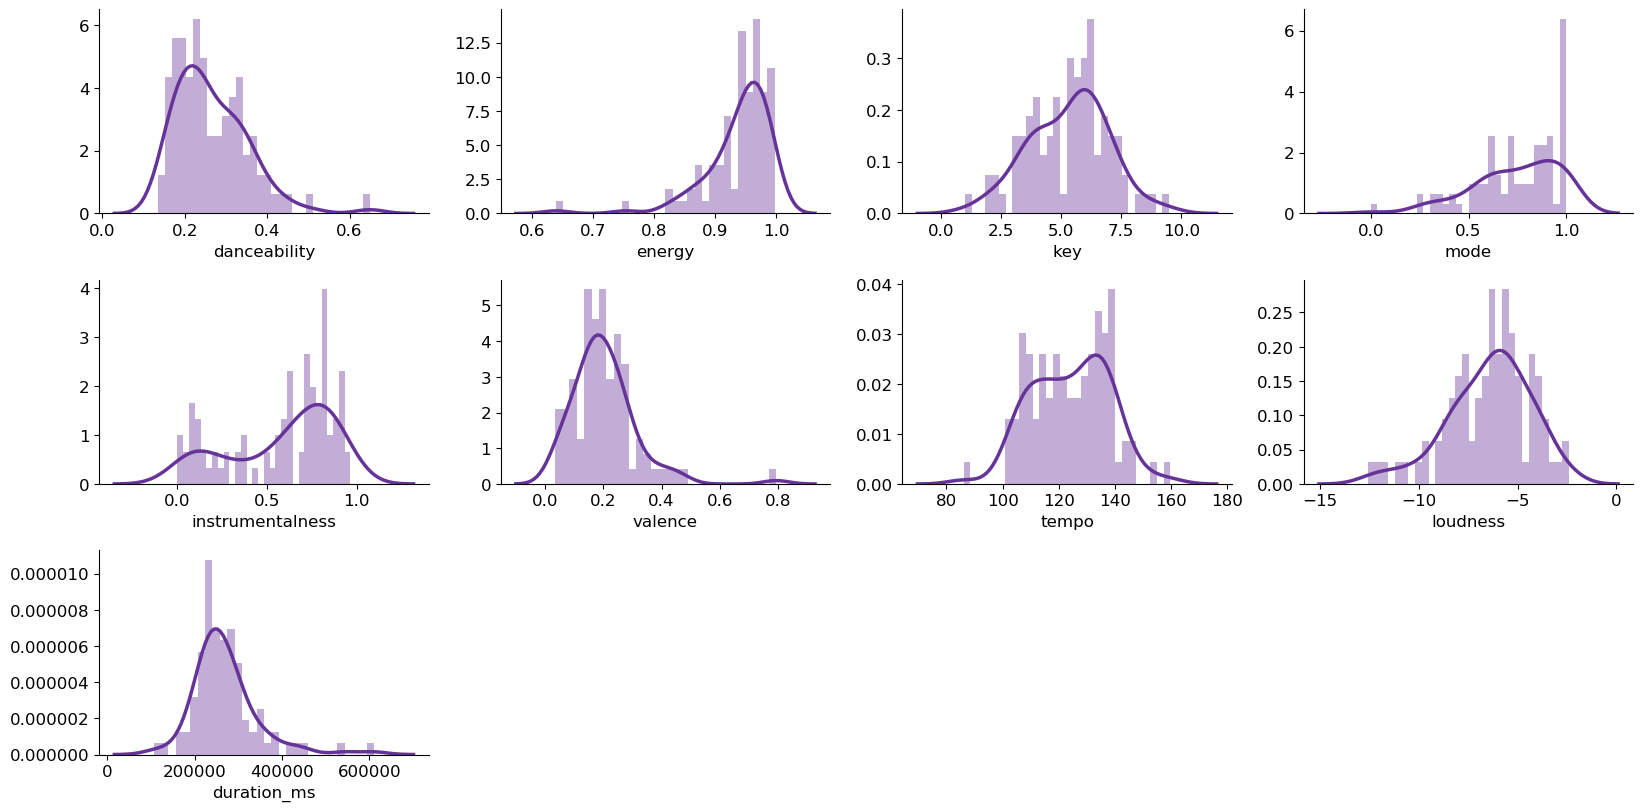

In [51]:
EDA.plot_num_hist(album_data, bins=30, figsize=(16,8))

In [52]:
for col in album_data.columns[2:]:
    print(f"{col}:")
    display(album_data[["Artist", "Album", col]].nlargest(5, col))
    display(album_data[["Artist", "Album", col]].nsmallest(5, col))

danceability:


,Artist,Album,danceability
28,Vampire,Vampire,0.649500
93,Fulci,Tropical Sun,0.506182
60,Discreation,Procreation Of The Wretched,0.447778
37,Deserted Fear,Kingdom Of Worms,0.439000
38,Benediction,Killing Music,0.426250


,Artist,Album,danceability
87,Witch Vomit,Buried Deep In A Bottomless Grave,0.134667
53,Vomitory,Raped In Their Own Blood,0.145630
67,Corpsessed,Impetus of Death,0.152037
69,Necrot,Blood Offerings,0.154833
100,Hyperdontia,Nexus of Teeth,0.157167


energy:


,Artist,Album,energy
53,Vomitory,Raped In Their Own Blood,0.998000
57,Keitzer,Ascension,0.997400
74,Carnation,Chapel Of Abhorrence,0.992273
60,Discreation,Procreation Of The Wretched,0.992000
56,Requiem,Global Resistance Rising,0.991300


,Artist,Album,energy
28,Vampire,Vampire,0.639200
82,Petrification,Hollow of The Void,0.753556
32,Fleshcrawl,Descend Into The Absurd,0.825750
67,Corpsessed,Impetus of Death,0.825875
40,Vanhelgd,Temple Of Phobos,0.835400


key:


,Artist,Album,key
7,Hypocrisy,End Of Disclosure,9.500000
49,Deicide,Legion,8.875000
85,Cannibal Corpse,Tomb Of The Mutilated,8.444444
29,Vampire,Cimmerian Shade,8.333333
43,Deicide,Deicide,7.600000


,Artist,Album,key
99,Burial Invocation,Abiogenesis,1.000000
62,Skeletal Remains,Condemned To Misery,2.000000
93,Fulci,Tropical Sun,2.000000
26,At The Gates,The Red In The Sky Is Ours,2.222222
47,Morfin,Consumed By Evil,2.250000


mode:


,Artist,Album,mode
21,Obituary,The End Complete,1.0
22,Entombed,Left Hand Path,1.0
25,Asphyx,Death … The Brutal Way,1.0
26,At The Gates,The Red In The Sky Is Ours,1.0
28,Vampire,Vampire,1.0


,Artist,Album,mode
7,Hypocrisy,End Of Disclosure,0.00
41,Deserted Fear,Dead Shores Rising,0.25
97,Blood Incantation,Hidden History Of The Human Race,0.25
44,Entrails,Raging Death,0.30
102,Cannibal Corpse,The Bleeding,0.30


instrumentalness:


,Artist,Album,instrumentalness
88,Coffins,Beyond The Circular Demise,0.965000
16,Cannibal Corpse,Butchered At Birth,0.934625
63,Rude,Remnants …,0.926429
90,Incantation,Upon The Throne of Apocalypse,0.925429
27,At The Gates,With Fear I Kiss The Burning Darkness,0.915455


,Artist,Album,instrumentalness
57,Keitzer,Ascension,0.000604
6,Entombed,Morning Star,0.005374
42,Bloodbath,Nightmares Made Flesh,0.019467
26,At The Gates,The Red In The Sky Is Ours,0.045051
40,Vanhelgd,Temple Of Phobos,0.059156


valence:


,Artist,Album,valence
28,Vampire,Vampire,0.794200
11,Entombed,Wolverine Blues,0.472000
94,Cannabis Corpse,From Wisdom To Baked,0.450727
47,Morfin,Consumed By Evil,0.427250
49,Deicide,Legion,0.406288


,Artist,Album,valence
53,Vomitory,Raped In Their Own Blood,0.032400
89,Sempiternal Dusk,Cenotaph of Defectuous Creation,0.034820
57,Keitzer,Ascension,0.035590
74,Carnation,Chapel Of Abhorrence,0.050518
79,Fetid,Steeping Corporeal Mess,0.055875


tempo:


,Artist,Album,tempo
36,Deserted Fear,My Empire,159.756000
91,Cerebral Rot,Odious Descent Into Decay,153.256556
46,Fatalist,The Bitter End,147.375000
16,Cannibal Corpse,Butchered At Birth,145.673500
37,Deserted Fear,Kingdom Of Worms,144.444667


,Artist,Album,tempo
40,Vanhelgd,Temple Of Phobos,86.100200
69,Necrot,Blood Offerings,100.835500
76,Imprecation,Damnatio Ad Bestias,101.020625
67,Corpsessed,Impetus of Death,102.162750
103,Ossuarium,Living Tomb,103.451400


loudness:


,Artist,Album,loudness
25,Asphyx,Death … The Brutal Way,-2.417125
53,Vomitory,Raped In Their Own Blood,-2.450100
56,Requiem,Global Resistance Rising,-2.789700
55,Weak Aside,Forward Into Darkness,-3.300778
57,Keitzer,Ascension,-3.552500


,Artist,Album,loudness
50,Immolation,Dawn Of Possession,-12.547444
82,Petrification,Hollow of The Void,-11.916556
48,Malevolent Creation,The Ten Commandments,-11.713778
15,Cannibal Corpse,Eaten Back To Life,-10.909636
32,Fleshcrawl,Descend Into The Absurd,-10.574375


duration_ms:


,Artist,Album,duration_ms
99,Burial Invocation,Abiogenesis,610895.00
97,Blood Incantation,Hidden History Of The Human Race,543393.25
68,Blood Incantation,Starspawn,451113.25
23,Tribulation,The Formulas Of Death,435229.40
89,Sempiternal Dusk,Cenotaph of Defectuous Creation,423704.80


,Artist,Album,duration_ms
77,Deathgrave,"So Real, It's Now",106225.500000
39,Hierophant,Mass Grave,129247.000000
93,Fulci,Tropical Sun,163546.363636
20,Obituary,Slowly We Rot,173444.857143
92,Gatecreeper,Sonoran Depravation,188295.250000


**Observation:** Vampire's self-titled album is a strong outlier for energy and valence (and a weaker one for danceability). As it is not a typical album representing my collection, I will remove it for the fitting of the data.

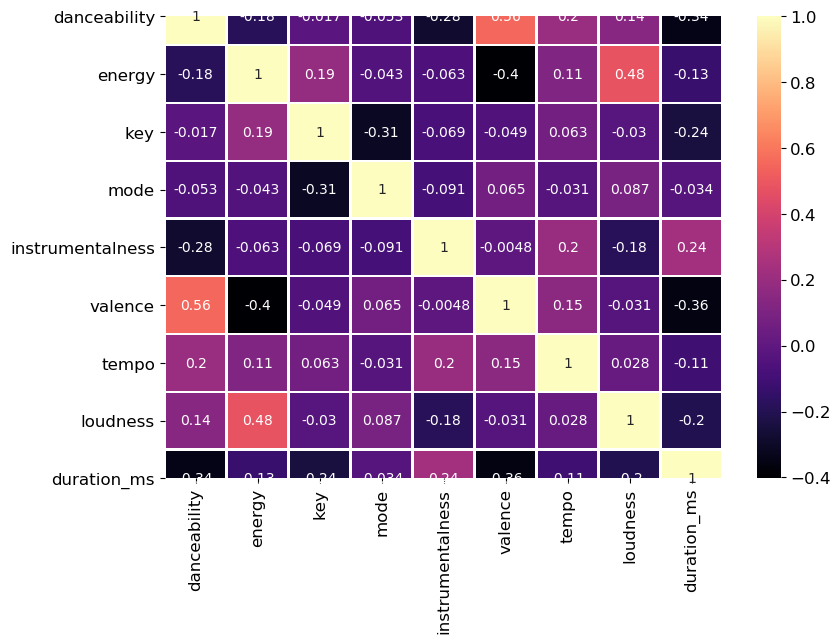

In [11]:
# Check for high correlations
EDA.plot_corr_map_num_all(album_data, figsize=(9, 6))

**Observation:** No strong correlations to be taken care of.

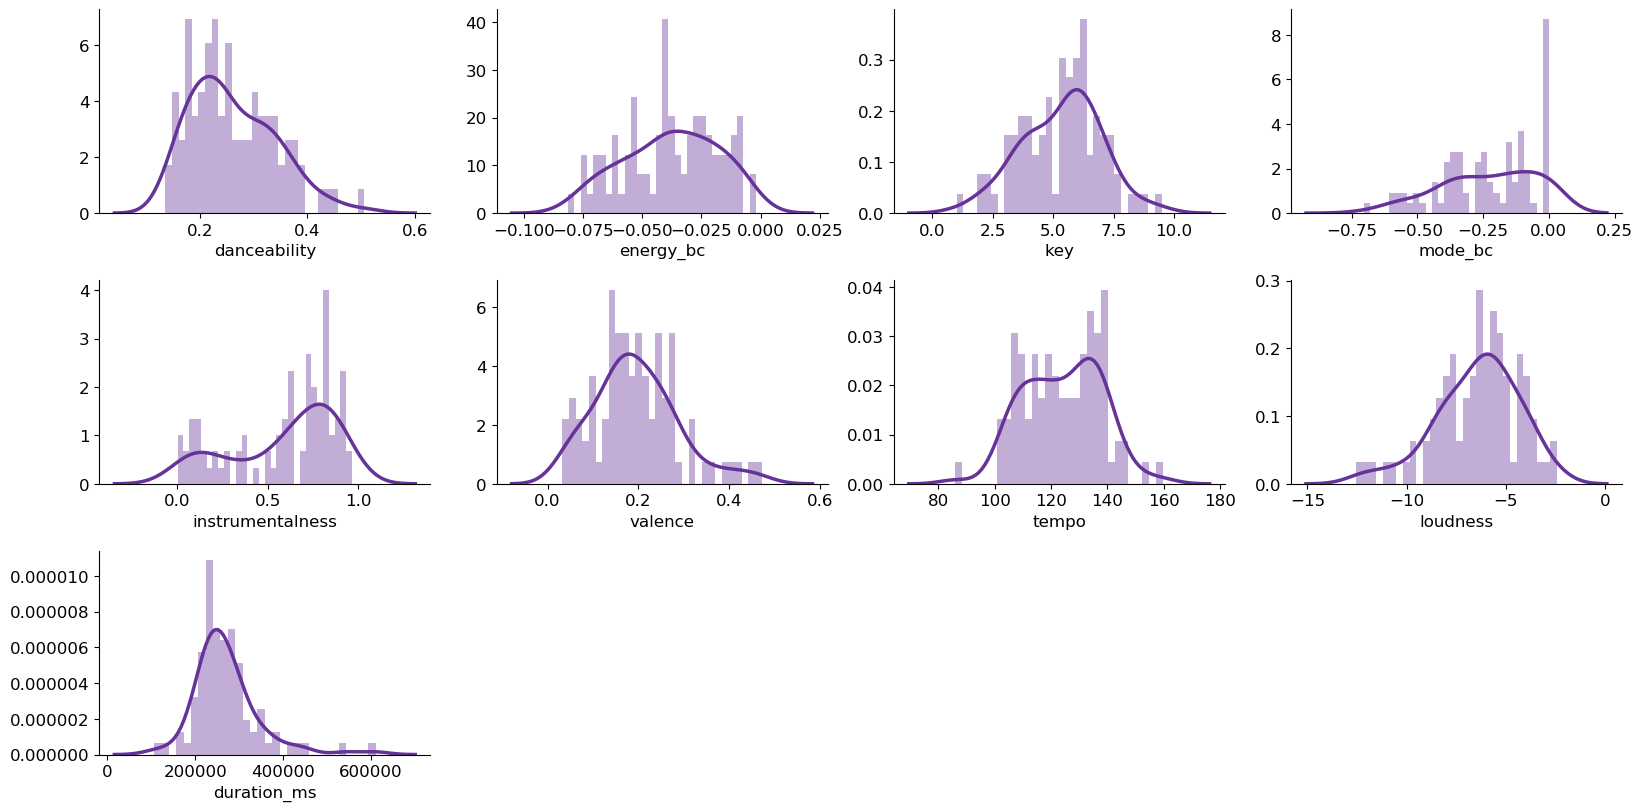

In [58]:
"""scale data to range (0,1)"""

# Remove outlier
album_data = album_data.loc[album_data["Album"] != "Vampire"]
album_data.reset_index(drop=True, inplace=True)

# Power-transfomrm energy and mode (skewed)
for col in ["energy", "mode"]:
    album_data[col] = album_data[col].apply(lambda x: x + 0.001 if x == 0 else x)
    album_data[col] = stats.boxcox(album_data[col])[0]
    album_data.rename(columns={col: str(col+"_bc")}, inplace=True)

scaled_data = minmax_scale(album_data.iloc[:, 2:])
scaled_data = pd.DataFrame(scaled_data, columns=album_data.columns[2:])

# check results
EDA.plot_num_hist(album_data, bins=30, figsize=(16, 8))

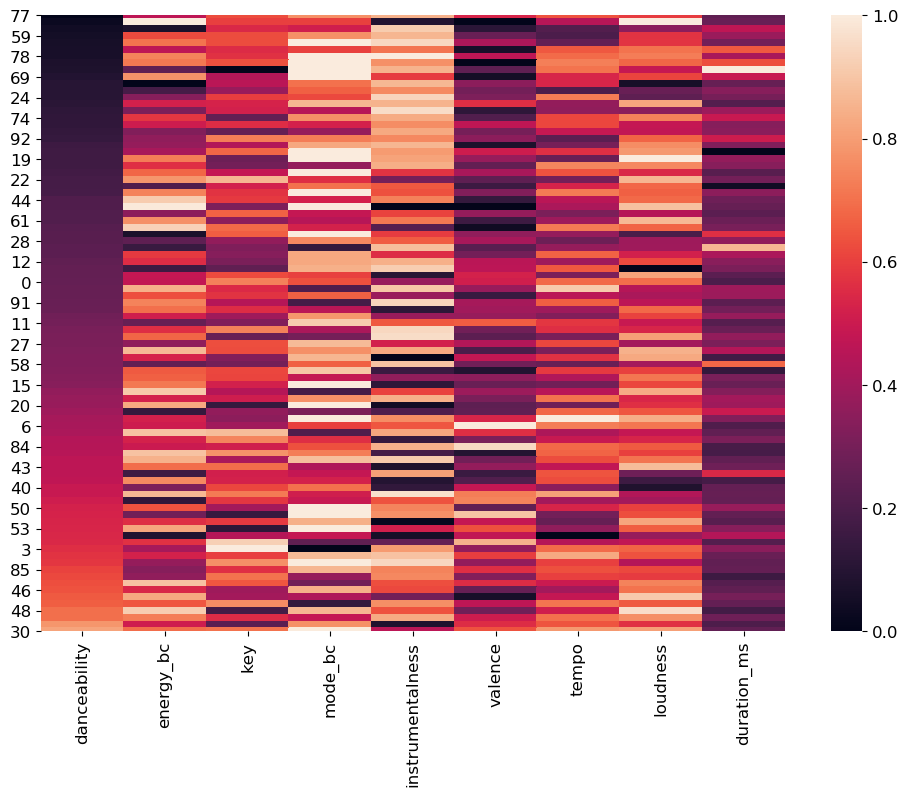

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(scaled_data.sort_values('danceability'));

## Recude Dimensionality with PCA

In [60]:
""" apply PCA with the goal to retain 95% of the variance"""

# initialize pca class object
pca = PCA(n_components=0.95) # PCA(n_components=bc_profile.shape[1])

# define function to apply pca and visualize the results
def pca_results(df, pca):
    ''' Create a DataFrame of the PCA results that includes dimension feature 
    weights and explained variance and visusalize the results with a bar chart.

    ARGUMENTS:
        - df: dataframe
        - pca: fitted sklearn PCA class object
        
    RETURNS:
        - pca_results: dataframe with pca results
        - Plot of PCA results (bar chart)
    '''
    
    pca.fit(df)

    # index dimensions, pca components, explained variance
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(df.keys()))
    components.index = dimensions
    
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # create a bar plot visualization: plot feature weights as function of components
    fig, ax = plt.subplots(figsize = (18,12))

    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    plt.legend(loc='lower right')

    # display explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # return concatenated DataFrame
    pca_results = pd.concat([variance_ratios, components], axis = 1)
    pca_results

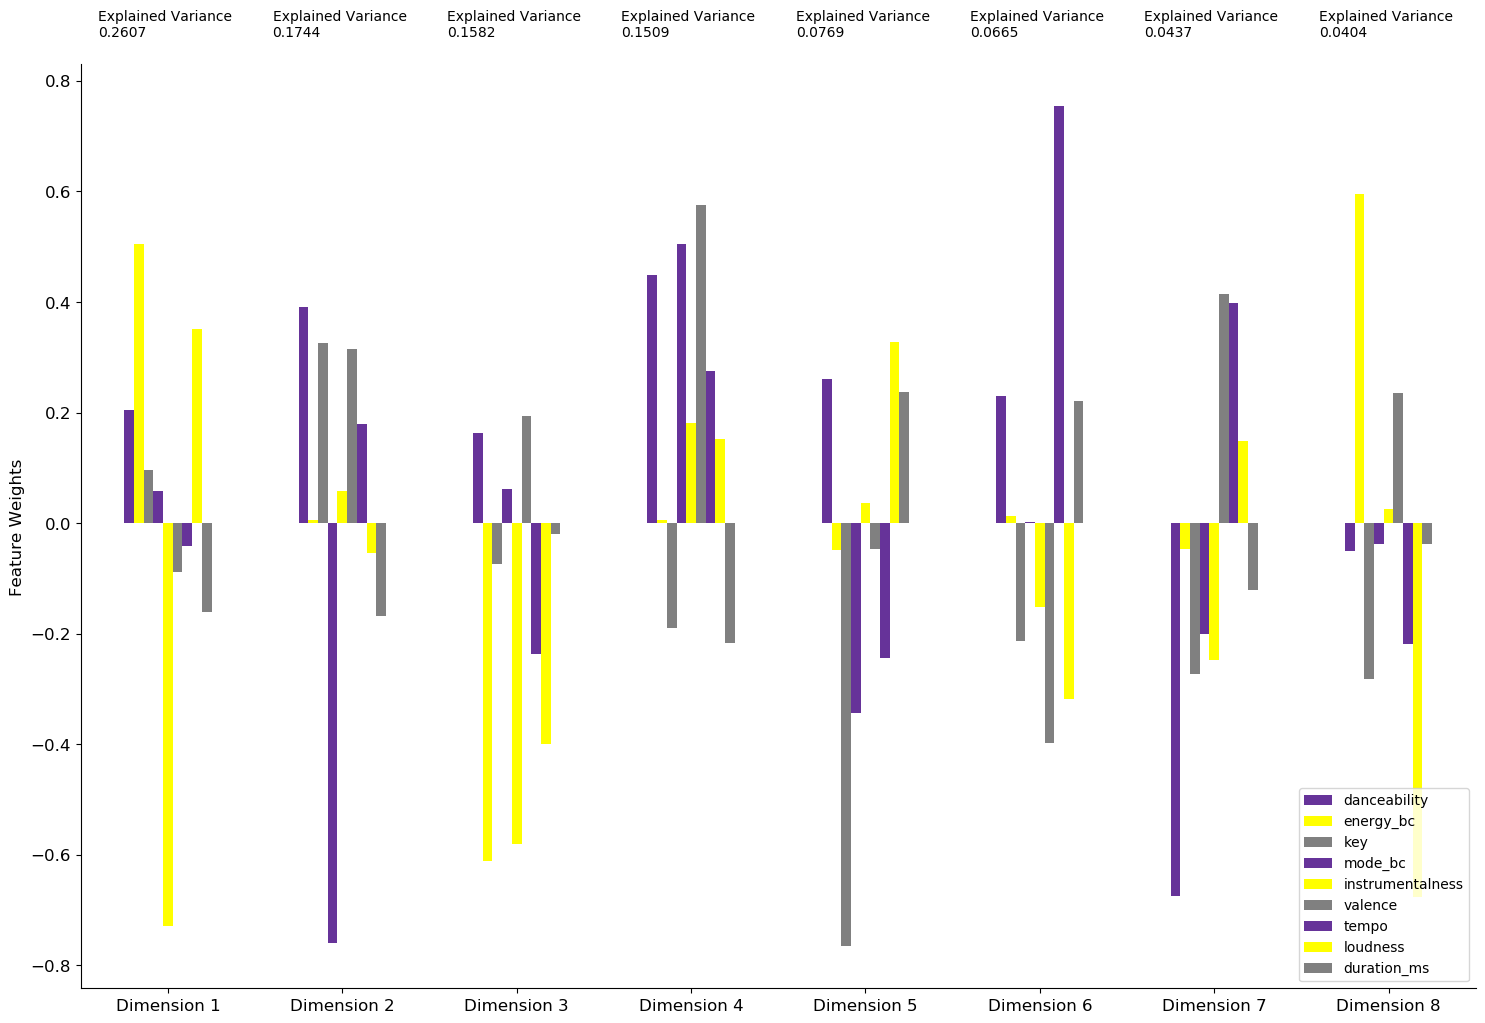

In [61]:
# call function
pca_results(scaled_data, pca)

In [62]:
"""def function to visualize pca-reduction"""

def create_biplot(orig_df, reduced_df, pca):
    '''Create a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.

    ARGUMENTS:
        - orig_df: dataframe before pca-transformation with column names
        - reduced_df: dataframe after pca-transformation (the first 2D are plotted)
        - pca: sklearn PCA object that contains the components_ attribute

    RETURNS:
        - a matplotlib AxesSubplot object (for any additional customization)

    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (18,12))

    # scatterplot of the reduced data    
    ax.scatter(x=reduced_df.loc[:, 'Dimension 1'], y=reduced_df.loc[:, 'Dimension 2'], 
        facecolors='rebeccapurple', edgecolors='w', s=100, alpha=0.8)

    # scaling factors to make the arrows easier to see
    arrow_size, text_pos = 1, 1

    # projections of the original features
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.1, head_length=0.1, linewidth=2, color='lightseagreen')
        ax.text(v[0]*text_pos, v[1]*text_pos, orig_df.columns[i], color='black', 
                 ha='center', va='bottom', fontsize=16)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);

    return ax

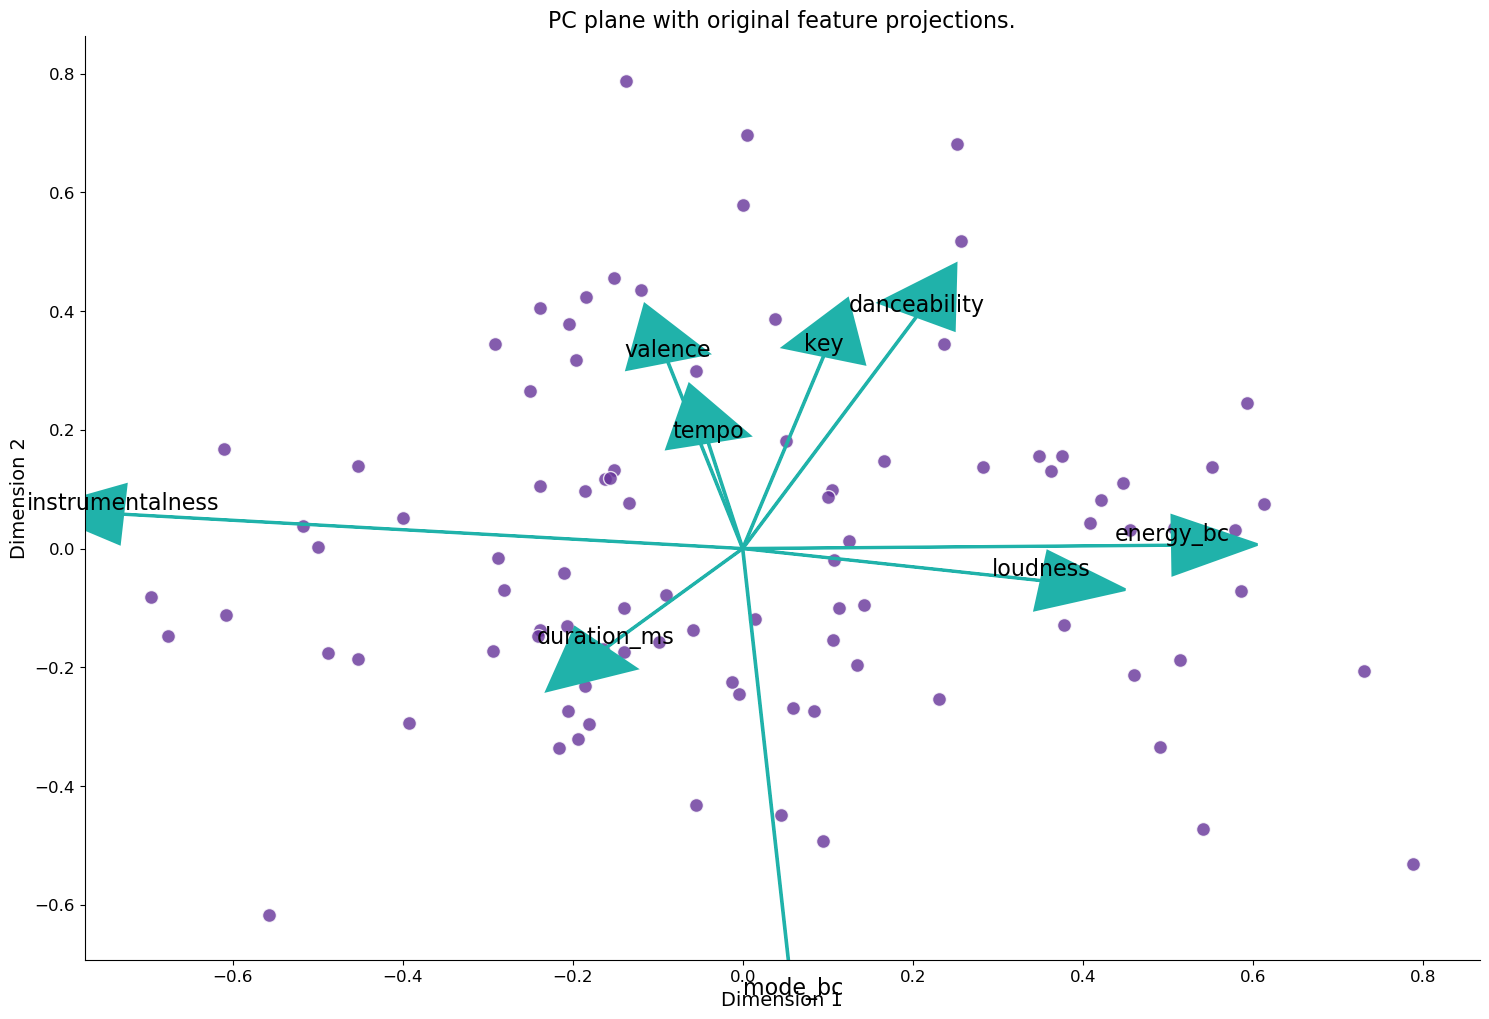

In [63]:
pca_2 = PCA(n_components=2)
reduced_data = pca_2.fit_transform(scaled_data)
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

# call function
create_biplot(scaled_data, reduced_data, pca_2);

## Apply k-means Clustering and evaluate Silhouette Scores


In [64]:
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
pca_5 = PCA(n_components=5)
pca_6 = PCA(n_components=6)

reduced_data_2 = pca_2.fit_transform(scaled_data)
reduced_data_3 = pca_3.fit_transform(scaled_data)
reduced_data_4 = pca_4.fit_transform(scaled_data)
reduced_data_5 = pca_5.fit_transform(scaled_data)
reduced_data_6 = pca_6.fit_transform(scaled_data)

# range of cluster numbers to be tested
cluster_range = [3, 4, 5, 6, 7]

In [65]:
# define function to apply k-means to the reduced data, output silhouette score for different cluster numbers

def print_silhouette_kmeans(df, cluster_range):
    """Print silhouette scores for k-means clustering with sklearn.
    
    ARGUMENTS:
    - df: dataframe, containing the presumed clusters
    - cluster_range: list of integers with desired number of clusters
    
    RETURNS:
    - sil_scores: dict, containing the number of clusters and corresponding
    silhouette scores
    """
    
    sil_scores = {}

    for nc in cluster_range:
        kmeans = KMeans(n_clusters=nc)   
        kmeans.fit(df)

        # predict the cluster for each data point
        preds = kmeans.predict(df)
        # calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(df, preds)
        # append to dict
        sil_scores[nc] = score

    return sil_scores

In [66]:
sil_2 = print_silhouette_kmeans(reduced_data_2, cluster_range=cluster_range)
# check results
display(sil_2)

{3: 0.4173328550368719,
 4: 0.4075724599591378,
 5: 0.4008591999642223,
 6: 0.389673725404993,
 7: 0.3903643284033657}

In [67]:
sil_3 = print_silhouette_kmeans(reduced_data_3, cluster_range=cluster_range)
# check results
display(sil_3)

{3: 0.3342748577948312,
 4: 0.33644149033858145,
 5: 0.3445727283346416,
 6: 0.3253079673836295,
 7: 0.2826467543907624}

In [68]:
sil_4 = print_silhouette_kmeans(reduced_data_4, cluster_range=cluster_range)
# check results
display(sil_4)

{3: 0.268862158199055,
 4: 0.2720016007831123,
 5: 0.2755713352577586,
 6: 0.26615456019530265,
 7: 0.2360447553707556}

In [69]:
sil_5 = print_silhouette_kmeans(reduced_data_5, cluster_range=cluster_range)
# check results
display(sil_5)

{3: 0.23626182259937534,
 4: 0.2375139732012821,
 5: 0.23179168811808223,
 6: 0.24688902021665243,
 7: 0.2261392318274894}

In [70]:
sil_6 = print_silhouette_kmeans(reduced_data_6, cluster_range=cluster_range)
# check results
display(sil_6)

{3: 0.21289344924188142,
 4: 0.20945312451940976,
 5: 0.21101777930981375,
 6: 0.19551205025547275,
 7: 0.18332215344181382}

**Observations:** 5 clusters seems to be a good number, as expected the lower the dimensionality, the higher the scores. I will compare the results for some of the lower dimensionalities

## Append clusters to profile

In [71]:
# fit kmeans and predict the cluster for each data point
kmeans = KMeans(n_clusters=5)   
preds_2 = kmeans.fit_predict(reduced_data_2)

# safety-check: calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_2, preds_2)
print(score)

0.4008591999642223


In [72]:
# fit kmeans and predict the cluster for each data point
kmeans = KMeans(n_clusters=5)   
preds_3 = kmeans.fit_predict(reduced_data_3)

# safety-check: calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_3, preds_3)
print(score)

0.3445727283346416


In [73]:
# fit kmeans and predict the cluster for each data point
kmeans = KMeans(n_clusters=5)   
preds_4 = kmeans.fit_predict(reduced_data_4)

# safety-check: calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data_4, preds_4)
print(score)

0.2749669700233001


In [74]:
for n_dim, preds in enumerate([preds_2, preds_3, preds_4],start=2):
    assert len(preds) == scaled_data.shape[0] # safety-check
    album_data.loc[:, f'cluster_{n_dim}'] = preds + 1

In [75]:
album_data[["Artist", "Album", "cluster_2", "cluster_3", "cluster_4"]].sample(5)

,Artist,Album,cluster_2,cluster_3,cluster_4
7,Death,Scream Bloody Gore,3,2,4
35,Bloodbath,Nightmares Made Flesh,2,4,2
59,Necrot,Blood Offerings,1,1,5
29,Deserted Fear,My Empire,1,1,1
92,Ossuarium,Living Tomb,1,2,4


In [76]:
for cluster in album_data["cluster_2"].unique():
    print(cluster)
    print(sorted(album_data.loc[album_data["cluster_2"] == cluster]['Artist'].to_list()))

3
['At The Gates', 'Cannabis Corpse', 'Cannibal Corpse', 'Cannibal Corpse', 'Cerebral Rot', 'Death', 'Death', 'Entombed', 'Evocation', 'Fatalist', 'Fulci', 'Gatecreeper', 'Gatecreeper', 'Lifeless', 'Malevolent Creation', 'Merciless', 'Rude', 'Tribulation', 'Vanhelgd']
2
['At The Gates', 'Benediction', 'Bloodbath', 'Bloodbath', 'Cannibal Corpse', 'Carnation', 'Death', 'Deicide', 'Deserted Fear', 'Discreation', 'Entombed', 'Entombed', 'Keitzer', 'Obituary', 'Obituary', 'Obituary', 'Requiem', 'Skeletal Remains', 'Vampire', 'Vomitory', 'Weak Aside']
5
['Cannibal Corpse', 'Cannibal Corpse', 'Deicide', 'Deserted Fear', 'Deserted Fear', 'Entrails', 'Hypocrisy']
1
['Asphyx', 'Blood Of Seklusion', 'Cannibal Corpse', 'Coffins', 'Cryptic Brood', 'Death', 'Deathgrave', 'Decaying', 'Deserted Fear', 'Edge Of Sanity', 'Entombed', 'Entombed', 'Extremity', 'Fetid', 'Genocide Pact', 'Grave', 'Grotesque', 'Gruesome', 'Hierophant', 'Hyperdontia', 'Morfin', 'Mortuous', 'Necrot', 'Ossuarium', 'Sempiternal D

In [77]:
for cluster in album_data["cluster_3"].unique():
    print(cluster)
    print(sorted(album_data.loc[album_data["cluster_3"] == cluster]['Artist'].to_list()))

4
['At The Gates', 'Benediction', 'Bloodbath', 'Bloodbath', 'Cannibal Corpse', 'Carnation', 'Death', 'Death', 'Deicide', 'Deserted Fear', 'Discreation', 'Entombed', 'Entombed', 'Grotesque', 'Keitzer', 'Merciless', 'Obituary', 'Obituary', 'Obituary', 'Requiem', 'Skeletal Remains', 'Skeletal Remains', 'Vampire', 'Vomitory', 'Weak Aside']
3
['At The Gates', 'Cannabis Corpse', 'Cannibal Corpse', 'Cannibal Corpse', 'Cannibal Corpse', 'Cannibal Corpse', 'Cerebral Rot', 'Deserted Fear', 'Deserted Fear', 'Entombed', 'Entrails', 'Fatalist', 'Gatecreeper', 'Hypocrisy', 'Lifeless', 'Rude']
5
['Death', 'Deicide', 'Fulci', 'Malevolent Creation', 'Tribulation', 'Vanhelgd']
2
['Blood Incantation', 'Blood Incantation', 'Burial Invocation', 'Corpsessed', 'Death', 'Demigod ', 'Devourment', 'Edge Of Sanity', 'Evocation', 'Fleshcrawl', 'Gatecreeper', 'Ghastly', 'Grave', 'Hierophant', 'Immolation', 'Imprecation', 'Incantation', 'Morfin', 'Ossuarium', 'Petrification', 'Skinless', 'Therion']
1
['Asphyx', 'Bl

In [78]:
for cluster in album_data["cluster_4"].unique():
    print(cluster)
    print(sorted(album_data.loc[album_data["cluster_4"] == cluster]['Artist'].to_list()))

2
['At The Gates', 'Benediction', 'Bloodbath', 'Bloodbath', 'Cannibal Corpse', 'Carnation', 'Death', 'Death', 'Deicide', 'Discreation', 'Entombed', 'Entombed', 'Grotesque', 'Keitzer', 'Malevolent Creation', 'Merciless', 'Obituary', 'Obituary', 'Obituary', 'Skeletal Remains', 'Tribulation', 'Vampire', 'Vanhelgd', 'Vomitory', 'Weak Aside']
3
['At The Gates', 'Cannibal Corpse', 'Cannibal Corpse', 'Cannibal Corpse', 'Cannibal Corpse', 'Cerebral Rot', 'Deicide', 'Deserted Fear', 'Deserted Fear', 'Entrails', 'Gatecreeper', 'Hypocrisy']
4
['Blood Incantation', 'Blood Incantation', 'Burial Invocation', 'Corpsessed', 'Death', 'Death', 'Demigod ', 'Devourment', 'Evocation', 'Fleshcrawl', 'Ghastly', 'Hierophant', 'Immolation', 'Imprecation', 'Incantation', 'Ossuarium', 'Petrification', 'Therion']
1
['Blood Of Seklusion', 'Cannabis Corpse', 'Deathgrave', 'Deserted Fear', 'Deserted Fear', 'Edge Of Sanity', 'Entombed', 'Fatalist', 'Fulci', 'Gatecreeper', 'Grave', 'Morfin', 'Requiem', 'Skeletal Remai

## EDA, 2

**Check:** Can I find configurations for Death and Gruesome to be in the same cluster? And Cannibal Corpse and Cannabis Corpse?

In [79]:
# Prepare comparision df
comp_df = album_data[["Artist", "Album", "cluster_2", "cluster_3", "cluster_4"]] 
comp_df = pd.concat([comp_df, scaled_data], axis=1, join="inner")
assert len(comp_df) == len(album_data)

In [80]:
comp_df.loc[comp_df["Artist"].isin(["Death", "Gruesome"])]

,Artist,Album,cluster_2,cluster_3,cluster_4,danceability,energy_bc,key,mode_bc,instrumentalness,valence,tempo,loudness,duration_ms
4,Death,Human,3,5,4,0.509232,0.125698,0.578431,0.488391,0.638817,0.739920,0.403166,0.403667,0.259977
5,Death,Individual Thought Patterns,2,4,2,0.271029,0.698321,0.557276,0.459655,0.119578,0.400723,0.396680,0.684919,0.295033
7,Death,Scream Bloody Gore,3,2,4,0.211117,0.352446,0.670588,0.483608,0.607070,0.373499,0.314896,0.446703,0.236408
8,Death,Spiritual Healing,1,4,2,0.285649,0.514443,0.396285,0.783178,0.380905,0.377113,0.330197,0.606519,0.376224
62,Gruesome,Twisted Prayers,1,1,5,0.238102,0.588223,0.338235,0.827041,0.555162,0.296121,0.668152,0.521881,0.423717


In [81]:
comp_df.loc[comp_df["Artist"].isin(["Cannibal Corpse", "Cannabis Corpse"])].sort_values(["Artist"])

,Artist,Album,cluster_2,cluster_3,cluster_4,danceability,energy_bc,key,mode_bc,instrumentalness,valence,tempo,loudness,duration_ms
84,Cannabis Corpse,From Wisdom To Baked,3,3,1,0.446982,0.499855,0.513369,0.635788,0.848421,0.951609,0.686029,0.655251,0.188864
9,Cannibal Corpse,Eaten Back To Life,2,4,2,0.472431,0.755283,0.524064,0.525819,0.096304,0.212776,0.626994,0.161674,0.183549
10,Cannibal Corpse,Butchered At Birth,3,3,3,0.488764,0.863926,0.720588,0.512516,0.968504,0.730437,0.808807,0.439554,0.263099
71,Cannibal Corpse,Torture,5,3,3,0.629853,0.892357,0.647059,0.287912,0.630943,0.558462,0.497976,0.741301,0.225162
73,Cannibal Corpse,Red Before Black,1,1,5,0.465212,0.851350,0.421569,0.883608,0.912899,0.291932,0.625683,0.710790,0.250034
75,Cannibal Corpse,Tomb Of The Mutilated,5,3,3,0.422295,0.892977,0.875817,0.209613,0.821304,0.560712,0.426961,0.480483,0.253490
91,Cannibal Corpse,The Bleeding,3,3,3,0.268450,0.740592,0.447059,0.180439,0.941103,0.410942,0.662088,0.463702,0.238683


In [88]:
def create_biplot_w_segments(orig_df, reduced_df, pca, seg_col):
    '''Same as above, with coloration of segments and some random variation
    for the text position to make it more readable.
    '''

    fig, ax = plt.subplots(figsize = (16,9))

    # scatterplot of the reduced data    
    ax.scatter(x=reduced_df.loc[:, 'Dimension 1'], y=reduced_df.loc[:, 'Dimension 2'], 
        c=reduced_df.loc[:, seg_col], cmap='viridis', s=50, alpha=0.8)

    # projections of the original features
    feature_vectors = pca.components_.T
    for i, v in enumerate(feature_vectors):
        arrow_size, text_pos =1.5, (1.5+np.random.choice(np.array([0.1,-0.2])))  # random choice included, moved within loop
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, orig_df.columns[i], color='black', 
                 ha='center', va='bottom', fontsize=16)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);

    return ax

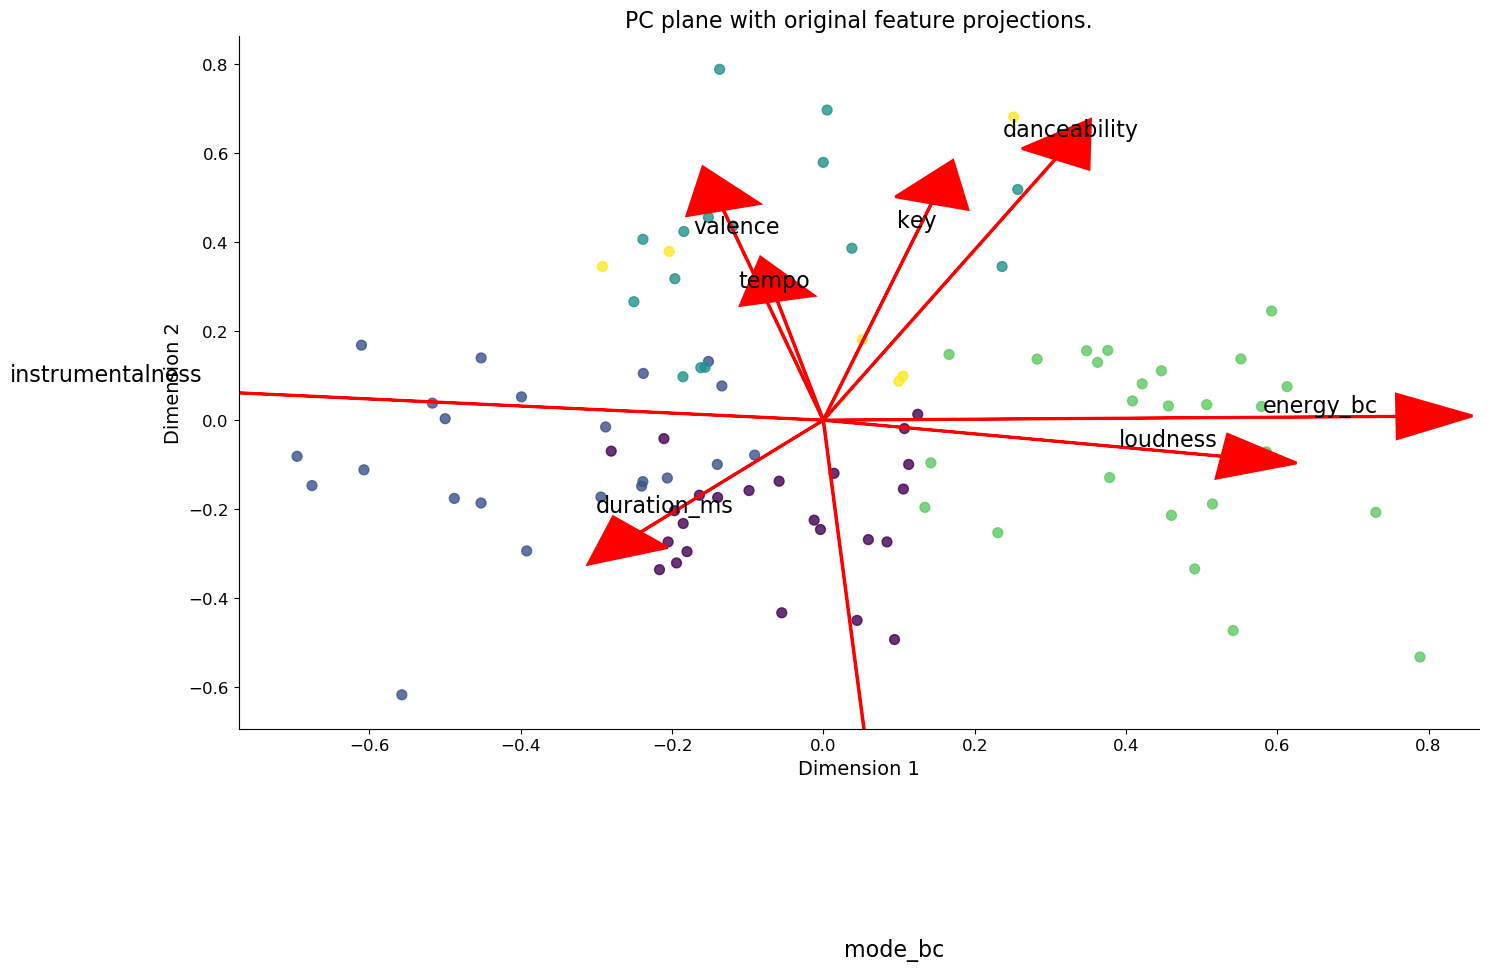

In [89]:
reduced_data["cluster_3"] = album_data["cluster_3"]

create_biplot_w_segments(scaled_data, reduced_data, pca_2, "cluster_3");

---